In [65]:
import numpy as np
import matplotlib.pyplot as plt


N = 100 

def generate_memory_patterns(N, P):
    
    patterns = np.random.choice([-1, 1], size=(P, N))
    return patterns

def calculate_weight_matrix(memories):
    
    patterns, neurons = memories.shape
    M = np.zeros((neurons, neurons))

    for a in range(patterns): 
        u_a = memories[a, :]      # a-th memory pattern (1xN vector)
        M += np.outer(u_a, u_a)    # N x N matrix where (i,j) is u_i^a * u_j^a

    np.fill_diagonal(M, 0)
    
    return M

def initial_state(target_memory, q0, N):

    s0 = np.zeros(N)
    
    for i in range(N):
        random_value = np.random.rand()
        if random_value < q0:
            s0[i] = target_memory[i]       # s_i(0) match the target memory with probability q0
        else:
            s0[i] = np.random.choice([-1, 1])
            
    return s0

def overlap(s_t, target_memory,):

    return np.sum(s_t * target_memory) / N


def hopfield_network(M, init_state, target_memory, max_steps=100):

    s_t = np.copy(init_state)
    q_history = [overlap(s_t, target_memory)]

    for step in range(max_steps):
        s_t_next = np.zeros(N)
        total_inputs = M @ s_t 

        s_t_next = np.sign(total_inputs)
        s_t_next[total_inputs == 0] = 1 

        if np.array_equal(s_t_next, s_t):      #fixed point
            break 
        
        s_t = s_t_next 
        q_history.append(overlap(s_t, target_memory))

    return q_history, s_t


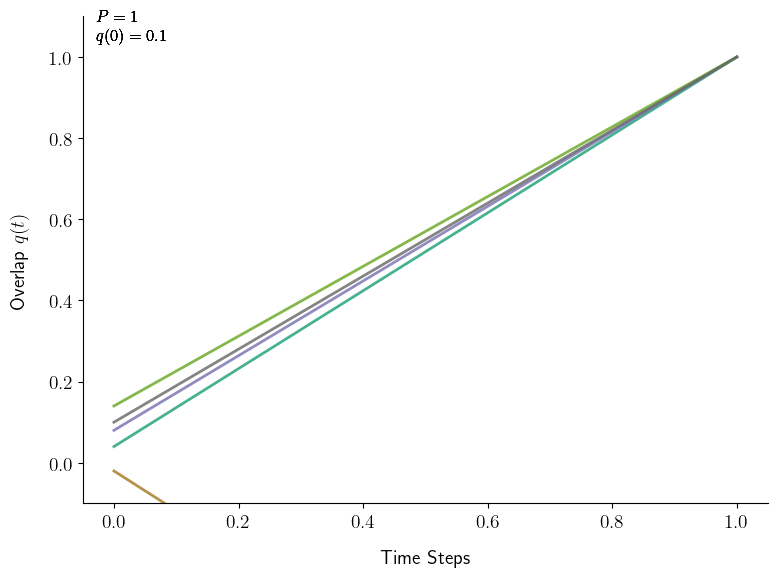

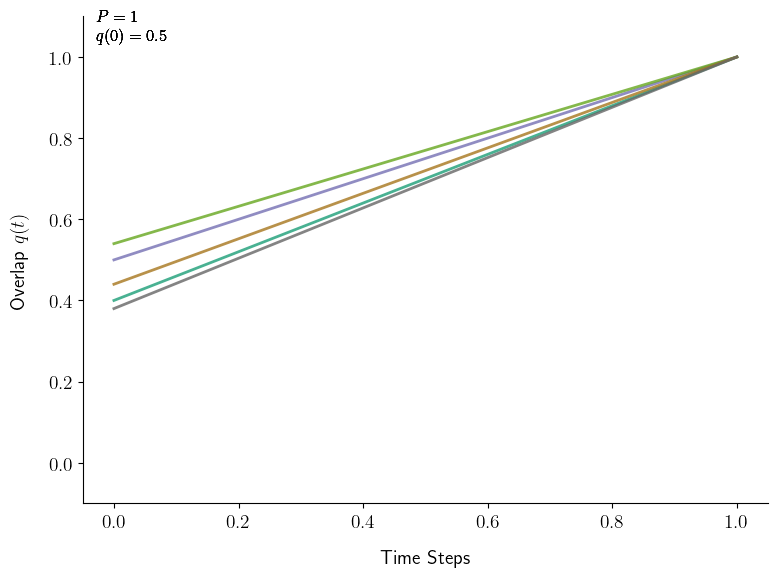

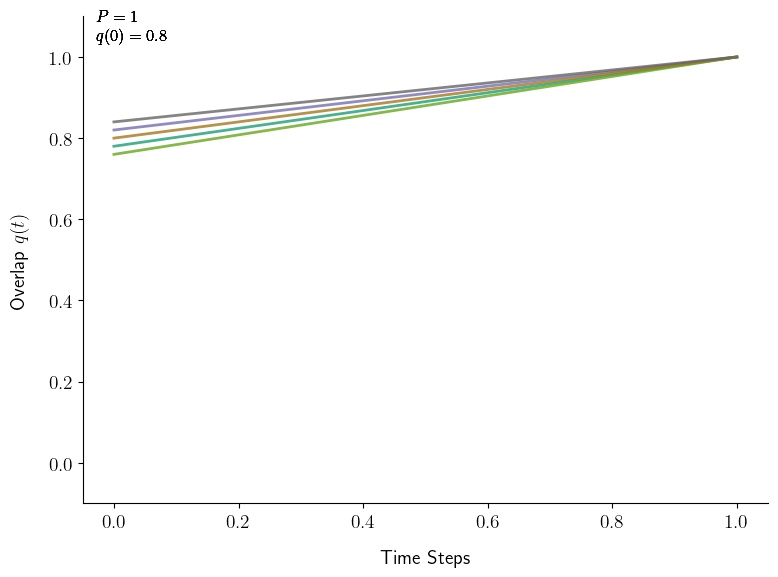

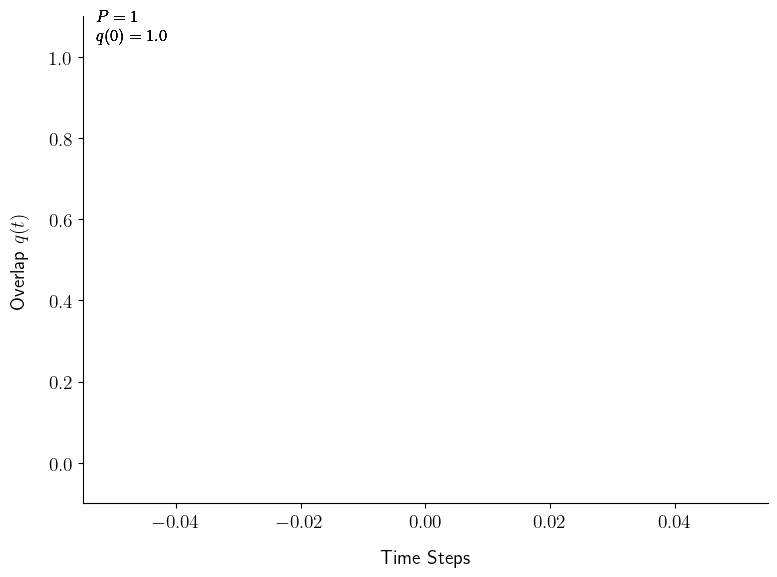

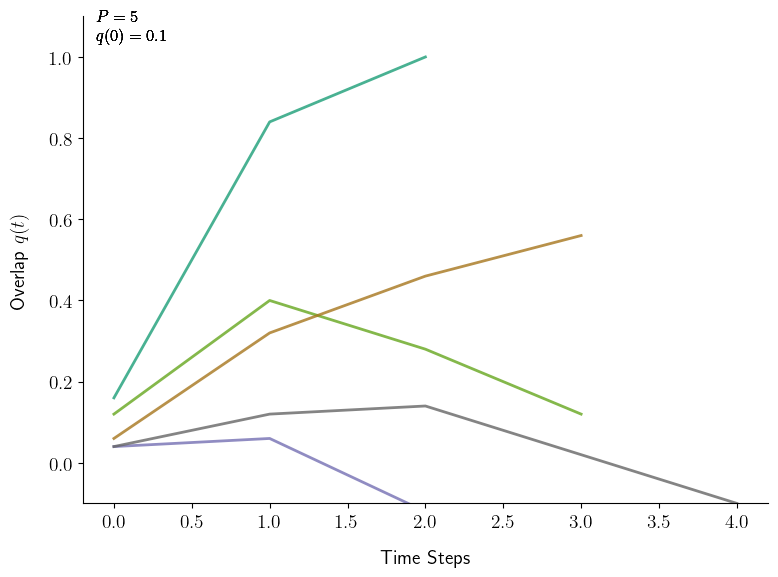

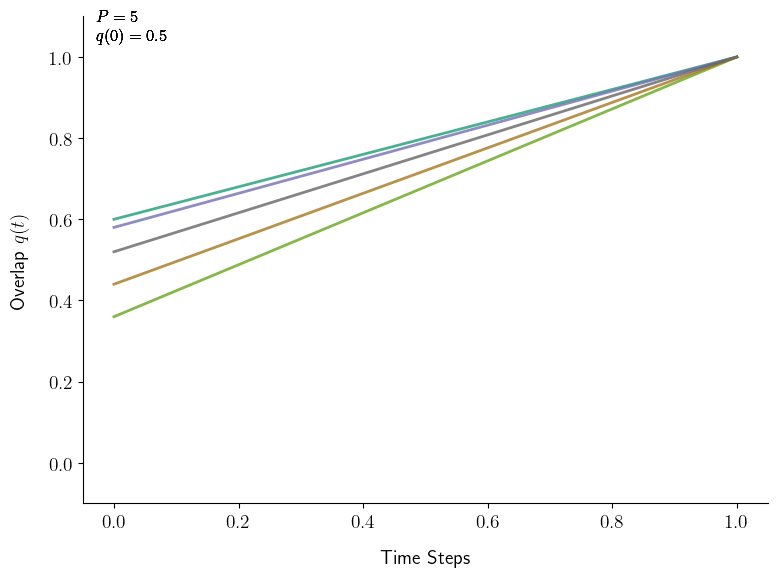

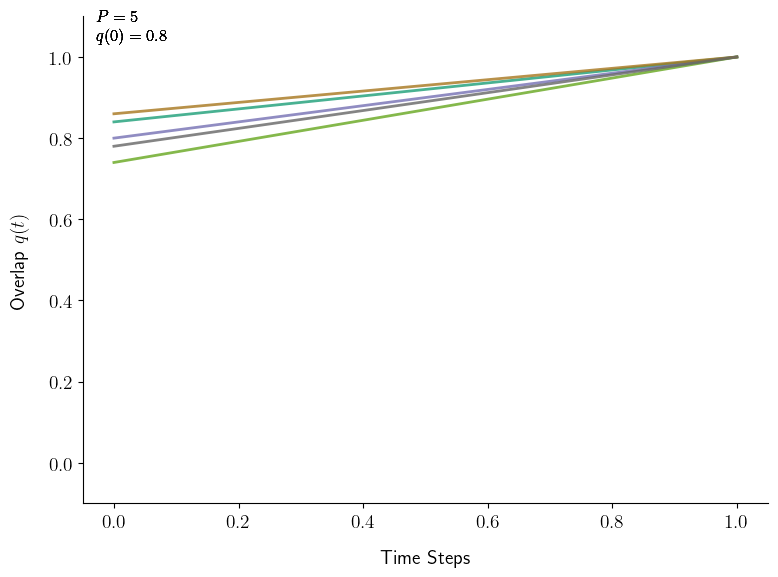

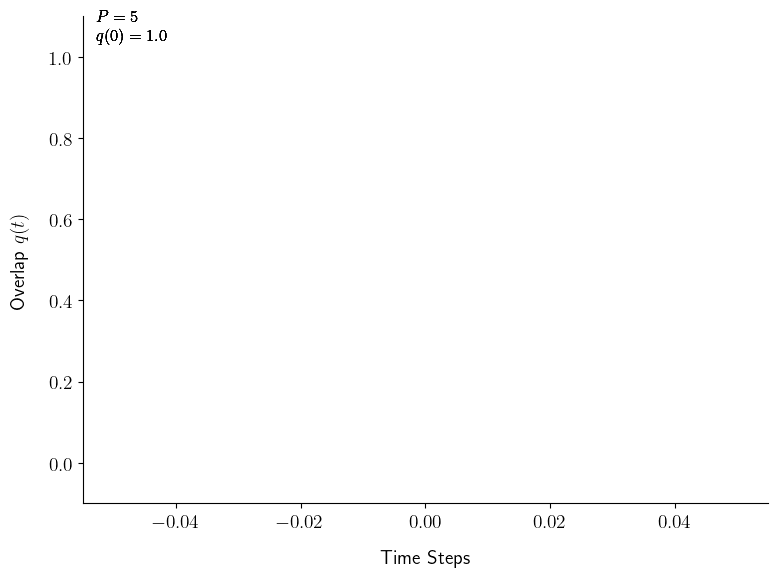

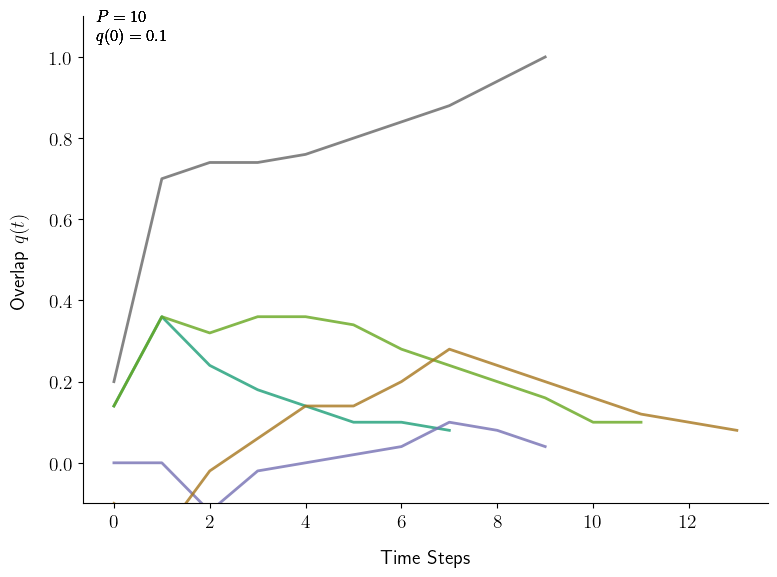

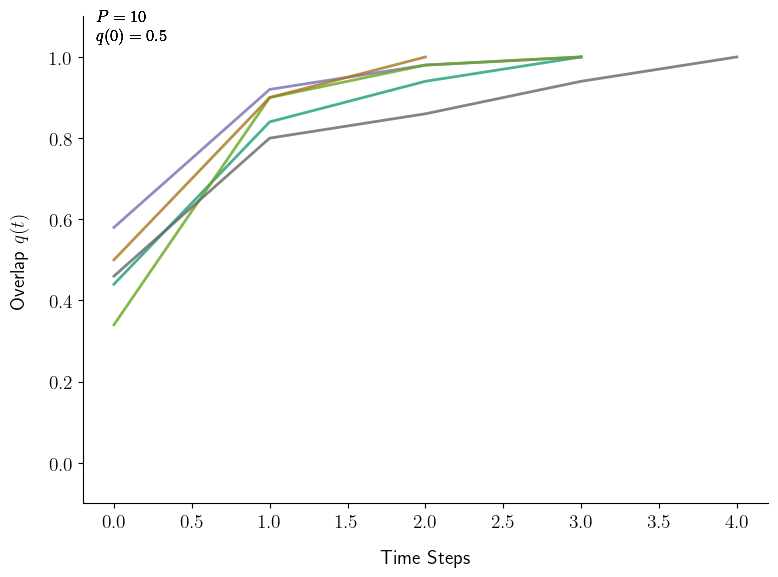

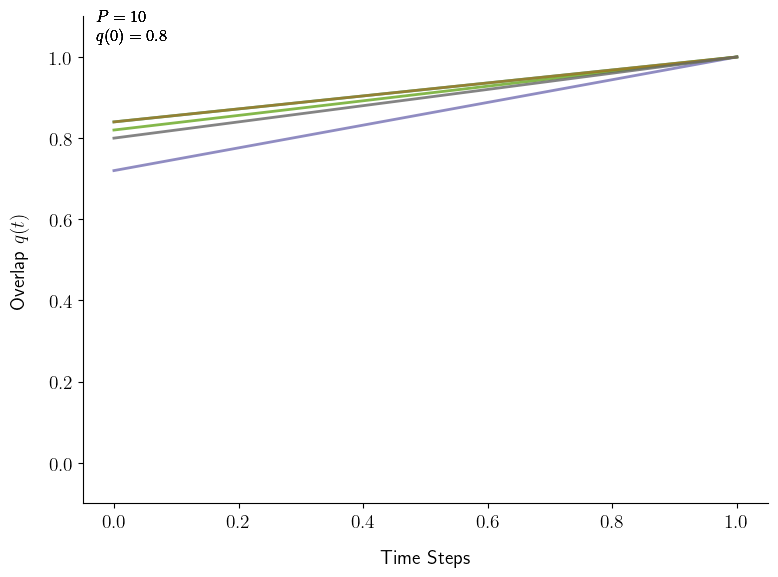

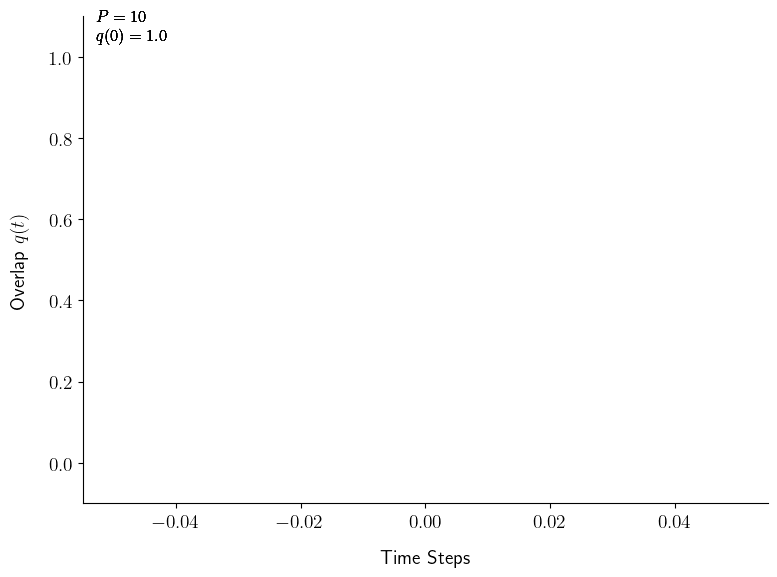

P=10, avg final q=1.00
P=11, avg final q=1.00
P=12, avg final q=1.00
P=13, avg final q=1.00
P=14, avg final q=1.00
P=15, avg final q=1.00
P=16, avg final q=1.00
P=17, avg final q=0.98
P=18, avg final q=1.00
P=19, avg final q=0.64
Capacity likely fails at P = 19


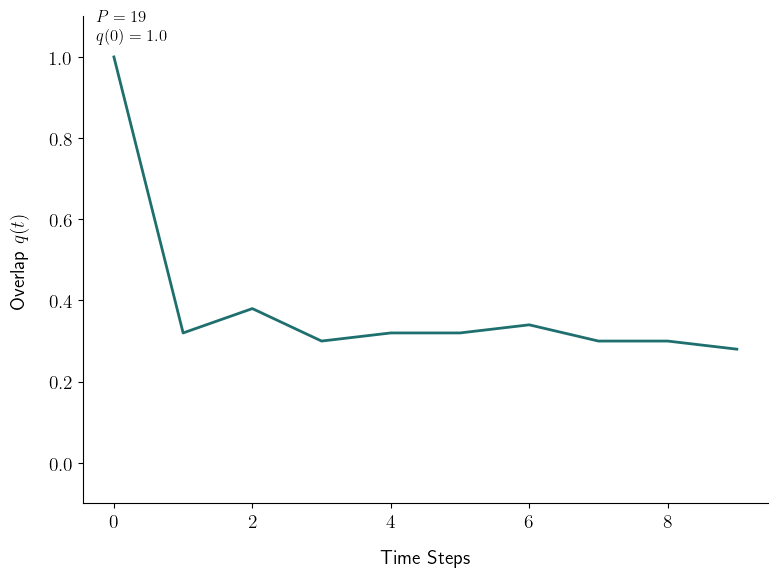

P=20, avg final q=1.00
P=21, avg final q=0.88
P=22, avg final q=1.00
P=23, avg final q=0.64
P=24, avg final q=0.32
P=25, avg final q=0.98
P=26, avg final q=0.20
P=27, avg final q=0.72
P=28, avg final q=0.92
P=29, avg final q=0.66


In [70]:
plt.rcParams.update({
    "font.size": 14,
    "text.usetex": True,
    "figure.figsize": (8, 6)
})

def remove_spines(ax):
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)


# Part a
num_simulations = 5
P_values_a      = [1, 5, 10]
q0_values_a     = np.linspace(0.0, 1.0, 11)

all_q_histories_a = {}

for P in P_values_a:
    memories      = generate_memory_patterns(N, P)
    target_memory = memories[0, :]
    w_M             = calculate_weight_matrix(memories)

    all_q_histories_a[P] = {}

    for q0 in q0_values_a:
        final_q_sum        = 0.0
        successful_recover = 0
        current_q_histories = []

        for _ in range(num_simulations):
            s0 = initial_state(target_memory, q0, N)
            q_his, _ = hopfield_network(w_M, s0, target_memory, max_steps=100)

            current_q_histories.append(q_his)
            fq = q_his[-1]
            final_q_sum += fq
            if fq > 0.9:
                successful_recover += 1

        success_rate = successful_recover / num_simulations
        all_q_histories_a[P][q0] = current_q_histories

        if q0 in [0.1, 0.5, 0.8, 1.0]:
            num_traces = min(5, len(current_q_histories))
            fig, ax = plt.subplots()
            cmap = plt.get_cmap('Dark2', num_traces)
            for idx, hist in enumerate(current_q_histories[:num_traces]):
                ax.plot(hist, color=cmap(idx), linewidth=2, alpha=0.8)

                ax.text(0.02, 1.0,
            f"$P = {P}$",
            transform=ax.transAxes,
            fontsize=12,
            fontweight='bold',
            va='center',
            ha='left')
                ax.text(0.02, 0.96,
            rf"$q(0) = {q0:.1f}$",
            transform=ax.transAxes,
            fontsize=12,
            va='center',
            ha='left')
    
            ax.set_xlabel('Time Steps', fontsize=14, labelpad=14)
            ax.set_ylabel(r'Overlap $q(t)$', fontsize=14, labelpad=14)
            ax.set_ylim(-0.1, 1.1)

            remove_spines(ax)

            plt.tight_layout()
            plt.savefig(f'P_{P}_q0_{q0:.1f}.png', dpi=600)
            plt.show()


# part b
P_values_b = np.arange(10, 30, 1)
failure_P  = None

for P in P_values_b:
    memories      = generate_memory_patterns(N, P)
    target_memory = memories[0, :]
    w_M_2             = calculate_weight_matrix(memories)

    final_q_sum = 0.0
    for _ in range(num_simulations):
        s0_2 = initial_state(target_memory, 1.0, N)
        qh, _ = hopfield_network(w_M_2, s0_2, target_memory, max_steps=100)
        final_q_sum += qh[-1]

    avg_final_q = final_q_sum / num_simulations
    print(f"P={P}, avg final q={avg_final_q:.2f}")

    if avg_final_q < 0.9 and failure_P is None:
        failure_P = P
        print(f"Capacity likely fails at P = {failure_P}")

        fig, ax = plt.subplots()
        s0, _ = None, None
        s0 = initial_state(target_memory, 1.0, N)
        qh, _ = hopfield_network(M, s0, target_memory, max_steps=100)
        ax.plot(qh, color='#1f6f6f', linewidth=2, label=r'$q(t)$')

        ax.text(0.02, 1.0,
            f"$P = {P}$",
            transform=ax.transAxes,
            fontsize=12,
            fontweight='bold',
            va='center',
            ha='left')
        ax.text(0.02, 0.96,
            rf"$q(0) = {q0:.1f}$",
            transform=ax.transAxes,
            fontsize=12,
            va='center',
            ha='left')
    
        ax.set_xlabel('Time Steps', fontsize=14, labelpad=14)
        ax.set_ylabel(r'Overlap $q(t)$', fontsize=14, labelpad=14)
        ax.set_ylim(-0.1, 1.1)
        remove_spines(ax)
        plt.savefig('hopfield_b.png', dpi=300)

        plt.tight_layout()
        plt.show()
